# Capstone Project

This notebook will be utilized for the capstone project of Coursera Applied Data Science courses.

### **Week 1 requirements**

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Data Gathering and Wrangling

Get the data. Here I utilized a text file download from Mint. While done manually here, this may be automated in the future. It also pulls the last 3 months of recorded data, so it should be current (if I updated my Mint account).

In [145]:
trans = "Capstone/transactions.txt"
file = open(trans, "r")
df = pd.read_csv(file)
df.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,9/25/2019,EQT*KFHP of Wa.,EQT*KFHP of Wa.,0.00,credit,Health Insurance,Visa Signature GO REWARDS,NaN,NaN
1,9/25/2019,EQT*KFHP of Wa.,EQT*KFHP of Wa.,308.78,debit,Health Insurance,Visa Signature GO REWARDS,NaN,NaN
2,9/25/2019,Transfer To Other,Transfer To Other,1114.12,debit,Transfer,EveryDay Checking,NaN,NaN
3,9/23/2019,King County Metro,KING COUNTY METRO 888-9886722 WA,40.00,debit,Business Services,Visa Signature GO REWARDS,NaN,NaN
4,9/23/2019,Chevron,CHEVRON 0308077 RENTON WA,35.95,debit,Gas & Fuel,Visa Signature GO REWARDS,NaN,NaN


In [146]:
print(df.dtypes)

Date                     object
Description              object
Original Description     object
Amount                  float64
Transaction Type         object
Category                 object
Account Name             object
Labels                  float64
Notes                   float64
dtype: object


In [147]:
df.corr()

,Amount,Labels,Notes
Amount,1.0,NaN,NaN
Labels,NaN,NaN,NaN
Notes,NaN,NaN,NaN


Not really going to go the numerical analysis path here.

Drop data based on 'credits' as we are trying to get the users to buy a service or product.

In [111]:
indexNames = df[ df['Transaction Type'] == 'credit' ].index
df.drop(indexNames , inplace=True)
df.reset_index()
df.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
1,9/25/2019,EQT*KFHP of Wa.,EQT*KFHP of Wa.,308.78,debit,Health Insurance,Visa Signature GO REWARDS,NaN,NaN
2,9/25/2019,Transfer To Other,Transfer To Other,1114.12,debit,Transfer,EveryDay Checking,NaN,NaN
3,9/23/2019,King County Metro,KING COUNTY METRO 888-9886722 WA,40.00,debit,Business Services,Visa Signature GO REWARDS,NaN,NaN
4,9/23/2019,Chevron,CHEVRON 0308077 RENTON WA,35.95,debit,Gas & Fuel,Visa Signature GO REWARDS,NaN,NaN
5,9/23/2019,Shell,SHELL OIL 57441815701 EATONVILLE WA,5.23,debit,Gas & Fuel,Visa Signature GO REWARDS,NaN,NaN


Select column of interest. Category will likely be used later for our foursquare search.

In [112]:
df = df.reset_index()
df = df[['Description', 'Original Description', 'Category']]
df.head()

,Description,Original Description,Category
0,EQT*KFHP of Wa.,EQT*KFHP of Wa.,Health Insurance
1,Transfer To Other,Transfer To Other,Transfer
2,King County Metro,KING COUNTY METRO 888-9886722 WA,Business Services
3,Chevron,CHEVRON 0308077 RENTON WA,Gas & Fuel
4,Shell,SHELL OIL 57441815701 EATONVILLE WA,Gas & Fuel


Let's get the unique categories then perform a group count to see what the users actually likes to buy.

In [68]:
df_cat = df.Category.unique()
df_cat

array(['Health Insurance', 'Transfer', 'Business Services', 'Gas & Fuel',
       'Parking', 'Coffee Shops', 'Shopping', 'Hair', 'Groceries',
       'Electronics & Software', 'Gym', 'Student Loan', 'Mortgage & Rent',
       'Pharmacy', 'Air Travel', 'Alcohol & Bars', 'Auto Insurance',
       'Fast Food', 'Gift', 'Movies & DVDs'], dtype=object)

In [77]:
df_u = df.groupby('Category')['Description'].count()
df_u

Category
Air Travel                 1
Alcohol & Bars             1
Auto Insurance             1
Business Services          8
Coffee Shops              31
Electronics & Software     4
Fast Food                  2
Gas & Fuel                 8
Gift                       1
Groceries                  4
Gym                        4
Hair                       2
Health Insurance           7
Mortgage & Rent            3
Movies & DVDs              1
Parking                    5
Pharmacy                   1
Shopping                   4
Student Loan               7
Transfer                   4
Name: Description, dtype: int64

Must be a coffee fiend.

### Let's do some **data visualization** to get a better handle of our categories.

In [76]:
import matplotlib.pyplot as plt

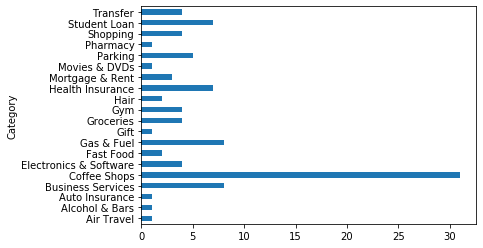

In [80]:
plt.figure()
df_u.plot(kind='barh')

Let's cut down on the categories. The user is unlikely to care about student loans and some other categories in this application.

In [83]:
lst = ['Alcohol & Bars', 'Coffee Shops', 'Electronics & Software', 'Fast Food', 'Gas & Fuel', 'Gift', 'Groceries', 'Gym', 'Hair', 'Movies & DVDs',  'Pharmacy', 'Shopping']

In [152]:
df_list = df_u[lst].reset_index()
df_list = df_list.rename(columns={'Description':'Count'})
df_list

,Category,Count
0,Alcohol & Bars,1
1,Coffee Shops,31
2,Electronics & Software,4
3,Fast Food,2
4,Gas & Fuel,8
5,Gift,1
6,Groceries,4
7,Gym,4
8,Hair,2
9,Movies & DVDs,1


Let's use a box plot to look for significant outliers that would skew our search.

In [157]:
df_plot = df_list.reset_index()
df_plot = df_plot[['Count']]
df_plot

,Count
0,1
1,31
2,4
3,2
4,8
5,1
6,4
7,4
8,2
9,1


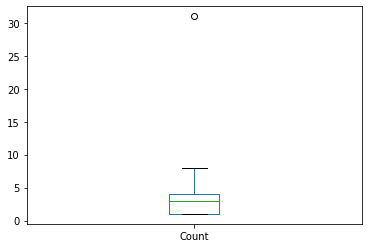

In [158]:
ax = df_plot.plot.box()

### Utilize simple feature scaling to get positive numbers between 0 and 10 (by multiplication by 10). Use this instead of min-max scaling to avoid a zero value for the min. Use this instead of Z-score as that will give negative value. The positive value will be utilized later as a weight.

In [160]:
df_list['NormScore']=(df_list['Count'])/(df_list['Count'].max())*10
df_list

,Category,Count,NormScore
0,Alcohol & Bars,1,0.322581
1,Coffee Shops,31,10.000000
2,Electronics & Software,4,1.290323
3,Fast Food,2,0.645161
4,Gas & Fuel,8,2.580645
5,Gift,1,0.322581
6,Groceries,4,1.290323
7,Gym,4,1.290323
8,Hair,2,0.645161
9,Movies & DVDs,1,0.322581


It seems as though coffee may dominate the recommender. Let's use a fudge for values that would dominate. They should still be number one though.

In [161]:
a = df_list['Count'].max()
index_max = df_list[ df_list['Count'] == a ].index
df_second = df_list.drop(index_max)
df_second

,Category,Count,NormScore
0,Alcohol & Bars,1,0.322581
2,Electronics & Software,4,1.290323
3,Fast Food,2,0.645161
4,Gas & Fuel,8,2.580645
5,Gift,1,0.322581
6,Groceries,4,1.290323
7,Gym,4,1.290323
8,Hair,2,0.645161
9,Movies & DVDs,1,0.322581
10,Pharmacy,1,0.322581


In [162]:
if a > 1.5 * df_second['Count'].max():
    b = int(df_second['Count'].max()*1.5) # setting the maximum to be at most 1.5X the second most
else:
    b = a
df_list
df_list.loc[index_max, ['Count']] = b
df_list

,Category,Count,NormScore
0,Alcohol & Bars,1,0.322581
1,Coffee Shops,12,10.000000
2,Electronics & Software,4,1.290323
3,Fast Food,2,0.645161
4,Gas & Fuel,8,2.580645
5,Gift,1,0.322581
6,Groceries,4,1.290323
7,Gym,4,1.290323
8,Hair,2,0.645161
9,Movies & DVDs,1,0.322581


Let's redo the **NormScore**

In [163]:
df_list['NormScore']=(df_list['Count'])/(df_list['Count'].max())*10
df_list

,Category,Count,NormScore
0,Alcohol & Bars,1,0.833333
1,Coffee Shops,12,10.000000
2,Electronics & Software,4,3.333333
3,Fast Food,2,1.666667
4,Gas & Fuel,8,6.666667
5,Gift,1,0.833333
6,Groceries,4,3.333333
7,Gym,4,3.333333
8,Hair,2,1.666667
9,Movies & DVDs,1,0.833333


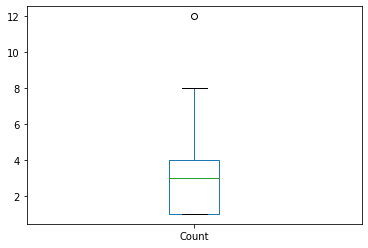

In [169]:
df_plot2 = df_list.reset_index()

df_plot2 = df_plot2[['Count']]
ax = df_plot2.plot.box()

Not as extreme as before, and I may get more results than coffee shops at the end game. Though I do not think I would have been disappointed.

### **Foursquare**

Import libraries

In [172]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Foursquare secret info.

In [176]:
# @hidden_cell
CLIENT_ID = 'DAWUWCHTEQRH4GDBQ42FC45XVCD5ZSGHVRBCKHVYCPZJESIG' # your Foursquare ID
CLIENT_SECRET = 'VEFKT0R5OZMUCH0RIZ5QUYJOQNJJF3MJ4DSV312WZVMNE0JP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's assume we are traveling to a new area. We could incorporate a UI to get the info as an input or we could tie it to a GPS. For this assignment, let's assume that London is calling.

In [206]:
address = 'Westminster, London SW1A 0AA, United Kingdom' # yes, this is the palace address

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5009835 -0.123737


### Initialize a dataframe to store search data. Let's limit to closest 5 of each in category.

In [233]:
radius = 500
LIMIT = 5
dataframe = pd.DataFrame()

""


In [234]:
count = 1
for cat in df_list['Category']:
    search_query = cat
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = dataframe.append(json_normalize(venues))
    
    while len(dataframe) < LIMIT * count:
        dataframe = dataframe.append(pd.Series(), ignore_index=True) # ensure appended up to lIMIT for later processing
    count += 1

dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...","[{'label': 'display', 'lat': 51.50033327881625...",51.500333,-0.130645,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...","[{'label': 'display', 'lat': 51.50684047845003...",51.506840,-0.123889,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1579034291
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...","[{'label': 'display', 'lat': 51.50111406437572...",51.501114,-0.124743,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291
7,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...","[{'label': 'display', 'lat': 51.49997320903263...",51.499973,-0.118974,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291
8,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...","[{'label': 'display', 'lat': 51.50304865891913...",51.503049,-0.115980,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291
9,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...","[{'label': 'display', 'lat': 51.50121966342386...",51.501220,-0.129109,NaN,NaN,Greater London,Costa Coffee,v-1579034291


In [235]:
dataframe
len(dataframe)

60

### Let's add a column of labels using **concat**, as the table sizes were specifically created the same length

In [250]:
dataframelabels = list()
for i in range(0, len(df_list)):
    for j in range(0, LIMIT):
        dataframelabels.append(df_list['Category'][i])
dataframelabels = pd.DataFrame(dataframelabels)
dataframelabels.columns = ['Category']
dataframelabels

,Category
0,Alcohol & Bars
1,Alcohol & Bars
2,Alcohol & Bars
3,Alcohol & Bars
4,Alcohol & Bars
5,Coffee Shops
6,Coffee Shops
7,Coffee Shops
8,Coffee Shops
9,Coffee Shops


In [280]:
dataframe.reset_index()
dataframelabels.reset_index()
df_join = pd.concat([dataframe, dataframelabels], axis=1)
df_join

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,Category
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...","[{'label': 'display', 'lat': 51.50033327881625...",51.500333,-0.130645,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291,Alcohol & Bars
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...","[{'label': 'display', 'lat': 51.50684047845003...",51.506840,-0.123889,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291,Alcohol & Bars
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcohol & Bars
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcohol & Bars
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alcohol & Bars
5,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...","[{'label': 'display', 'lat': 51.50111406437572...",51.501114,-0.124743,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops
7,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...","[{'label': 'display', 'lat': 51.49997320903263...",51.499973,-0.118974,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops
8,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...","[{'label': 'display', 'lat': 51.50304865891913...",51.503049,-0.115980,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops
9,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...","[{'label': 'display', 'lat': 51.50121966342386...",51.501220,-0.129109,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops


### Let's wrangle this into something useful to feed into the code to get **ratings**

No longer need the NaN rows that I created before

In [281]:
df_join.dropna(axis = 0, inplace=True, subset=['categories'])
df_join = df_join.reset_index()
df_join = df_join.drop(['index'], axis = 1) # index cleaning
df_join

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,Category
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...","[{'label': 'display', 'lat': 51.50033327881625...",51.500333,-0.130645,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291,Alcohol & Bars
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...","[{'label': 'display', 'lat': 51.50684047845003...",51.506840,-0.123889,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291,Alcohol & Bars
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...","[{'label': 'display', 'lat': 51.50111406437572...",51.501114,-0.124743,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...","[{'label': 'display', 'lat': 51.49997320903263...",51.499973,-0.118974,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops
5,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...","[{'label': 'display', 'lat': 51.50304865891913...",51.503049,-0.115980,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...","[{'label': 'display', 'lat': 51.50121966342386...",51.501220,-0.129109,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops
7,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4debf42d45dd3993a8b36453,244-246 Westminster Bridge Rd,GB,London,United Kingdom,NaN,466.0,"[244-246 Westminster Bridge Rd, London, Greate...","[{'label': 'display', 'lat': 51.50072882363885...",51.500729,-0.117018,NaN,NaN,Greater London,A. P. Food Express,v-1579034291,Fast Food
8,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4c56d3626418a5930ee47d0e,St Thomas' Hospital,GB,London,United Kingdom,Westminster Bridge Rd,352.0,"[St Thomas' Hospital (Westminster Bridge Rd), ...","[{'label': 'display', 'lat': 51.49995061310521...",51.499951,-0.118922,NaN,SE1 7EH,Greater London,M&S Simply Food,v-1579034291,Fast Food
9,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",0.0,4b546a4af964a52072ba27e3,17 Smith Sq,GB,London,United Kingdom,NaN,615.0,"[17 Smith Sq, London, Greater London, SW1 P 2,...","[{'label': 'display', 'lat': 51.49561591451376...",51.495616,-0.125898,NaN,SW1 P 2,Greater London,"Department for Environment, Food & Rural Affai...",v-1579034291,Fast Food


### Let's use foursquare to get some ratings for our recommender

In [340]:
ratings = list()
for venue_id in df_join['id']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        ratings.append(result['response']['venue']['rating'])
    except:
        ratings.append('NaN')

In [341]:
ratings

['NaN',
 'NaN',
 7.9,
 'NaN',
 6.6,
 6.2,
 'NaN',
 'NaN',
 6.8,
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 7.4,
 6.1,
 7.6,
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN']

### Seems like we may get quite a few unrated places - let's do some statistics and give them some value - let go with one standard deviations below the mean

In [413]:
ratings1 = pd.DataFrame(ratings)
ratings1.columns = ['Rating']
ratings1
ratings2 = ratings1.drop(ratings1[ratings1.Rating == 'NaN'].index)
mean = ratings2.mean()
std = ratings2.std()
low = mean - std
low

Rating    6.240819
dtype: float64

In [414]:
final_ratings = list()
for i in ratings:
    if i == 'NaN':
        final_ratings.append(low[0])
    else:
        final_ratings.append(i)
final_ratings = pd.DataFrame(final_ratings)

In [415]:
df_join.reset_index()
final_ratings.reset_index()
final_ratings.columns = ['Rating']
df_ratings = pd.concat([df_join, final_ratings], axis=1)
df_ratings

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,Category,Rating
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...","[{'label': 'display', 'lat': 51.50033327881625...",51.500333,-0.130645,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...","[{'label': 'display', 'lat': 51.50684047845003...",51.506840,-0.123889,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops,7.900000
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...","[{'label': 'display', 'lat': 51.50111406437572...",51.501114,-0.124743,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops,6.240819
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...","[{'label': 'display', 'lat': 51.49997320903263...",51.499973,-0.118974,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops,6.600000
5,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...","[{'label': 'display', 'lat': 51.50304865891913...",51.503049,-0.115980,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops,6.200000
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...","[{'label': 'display', 'lat': 51.50121966342386...",51.501220,-0.129109,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops,6.240819
7,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4debf42d45dd3993a8b36453,244-246 Westminster Bridge Rd,GB,London,United Kingdom,NaN,466.0,"[244-246 Westminster Bridge Rd, London, Greate...","[{'label': 'display', 'lat': 51.50072882363885...",51.500729,-0.117018,NaN,NaN,Greater London,A. P. Food Express,v-1579034291,Fast Food,6.240819
8,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4c56d3626418a5930ee47d0e,St Thomas' Hospital,GB,London,United Kingdom,Westminster Bridge Rd,352.0,"[St Thomas' Hospital (Westminster Bridge Rd), ...","[{'label': 'display', 'lat': 51.49995061310521...",51.499951,-0.118922,NaN,SE1 7EH,Greater London,M&S Simply Food,v-1579034291,Fast Food,6.800000
9,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",0.0,4b546a4af964a52072ba27e3,17 Smith Sq,GB,London,United Kingdom,NaN,615.0,"[17 Smith Sq, London, Greater London, SW1 P 2,...","[{'label': 'display', 'lat': 51.49561591451376...",51.495616,-0.125898,NaN,SW1 P 2,Greater London,"Department for Environment, Food & Rural Affai...",v-1579034291,Fast Food,6.240819


In [431]:
df_ratings['Rating']

0     6.240819
1     6.240819
2     7.900000
3     6.240819
4     6.600000
5     6.200000
6     6.240819
7     6.240819
8     6.800000
9     6.240819
10    6.240819
11    6.240819
12    6.240819
13    6.240819
14    6.240819
15    6.240819
16    6.240819
17    7.400000
18    6.100000
19    7.600000
20    6.240819
21    6.240819
22    6.240819
23    6.240819
24    6.240819
25    6.240819
26    6.240819
27    6.240819
Name: Rating, dtype: float64

Now we have a rating for each place, **df_ratings['Rating']**, as well as the user preferences above, **df_list['NormScore']**

In [416]:
df_list[['Category', 'NormScore']]

,Category,NormScore
0,Alcohol & Bars,0.833333
1,Coffee Shops,10.000000
2,Electronics & Software,3.333333
3,Fast Food,1.666667
4,Gas & Fuel,6.666667
5,Gift,0.833333
6,Groceries,3.333333
7,Gym,3.333333
8,Hair,1.666667
9,Movies & DVDs,0.833333


In [417]:
df_weighted = df_ratings.join(df_list.set_index('Category'), on='Category')
df_weighted

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,...,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,Category,Rating,Count,NormScore
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...",...,-0.130645,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819,1,0.833333
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...",...,-0.123889,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819,1,0.833333
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...",...,-0.124805,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops,7.900000,12,10.000000
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...",...,-0.124743,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops,6.240819,12,10.000000
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...",...,-0.118974,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops,6.600000,12,10.000000
5,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...",...,-0.115980,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops,6.200000,12,10.000000
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...",...,-0.129109,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops,6.240819,12,10.000000
7,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4debf42d45dd3993a8b36453,244-246 Westminster Bridge Rd,GB,London,United Kingdom,NaN,466.0,"[244-246 Westminster Bridge Rd, London, Greate...",...,-0.117018,NaN,NaN,Greater London,A. P. Food Express,v-1579034291,Fast Food,6.240819,2,1.666667
8,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4c56d3626418a5930ee47d0e,St Thomas' Hospital,GB,London,United Kingdom,Westminster Bridge Rd,352.0,"[St Thomas' Hospital (Westminster Bridge Rd), ...",...,-0.118922,NaN,SE1 7EH,Greater London,M&S Simply Food,v-1579034291,Fast Food,6.800000,2,1.666667
9,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",0.0,4b546a4af964a52072ba27e3,17 Smith Sq,GB,London,United Kingdom,NaN,615.0,"[17 Smith Sq, London, Greater London, SW1 P 2,...",...,-0.125898,NaN,SW1 P 2,Greater London,"Department for Environment, Food & Rural Affai...",v-1579034291,Fast Food,6.240819,2,1.666667


In [418]:
df_weighted['WeightScore'] = df_weighted['Rating'] * df_weighted['NormScore']
df_weighted

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,...,location.neighborhood,location.postalCode,location.state,name,referralId,Category,Rating,Count,NormScore,WeightScore
0,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",0.0,5d45ce66aea54e0008ec02dc,"Unit 35, Old School Pl",GB,Croydon,United Kingdom,NaN,484.0,"[Unit 35, Old School Pl, Croydon, Greater Lond...",...,NaN,CR0 4GA,Greater London,Beer Guy | Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819,1,0.833333,5.200683
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",0.0,5d24d9d8dbde1100259c8731,13 Essex Street,GB,London,United Kingdom,NaN,652.0,"[13 Essex Street, London, Greater London, WC2R...",...,NaN,WC2R 3AA,Greater London,Allnight Alcohol Delivery,v-1579034291,Alcohol & Bars,6.240819,1,0.833333,5.200683
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...",...,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops,7.900000,12,10.000000,79.000000
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...",...,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops,6.240819,12,10.000000,62.408193
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...",...,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops,6.600000,12,10.000000,66.000000
5,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...",...,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops,6.200000,12,10.000000,62.000000
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...",...,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops,6.240819,12,10.000000,62.408193
7,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4debf42d45dd3993a8b36453,244-246 Westminster Bridge Rd,GB,London,United Kingdom,NaN,466.0,"[244-246 Westminster Bridge Rd, London, Greate...",...,NaN,NaN,Greater London,A. P. Food Express,v-1579034291,Fast Food,6.240819,2,1.666667,10.401365
8,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0.0,4c56d3626418a5930ee47d0e,St Thomas' Hospital,GB,London,United Kingdom,Westminster Bridge Rd,352.0,"[St Thomas' Hospital (Westminster Bridge Rd), ...",...,NaN,SE1 7EH,Greater London,M&S Simply Food,v-1579034291,Fast Food,6.800000,2,1.666667,11.333333
9,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",0.0,4b546a4af964a52072ba27e3,17 Smith Sq,GB,London,United Kingdom,NaN,615.0,"[17 Smith Sq, London, Greater London, SW1 P 2,...",...,NaN,SW1 P 2,Greater London,"Department for Environment, Food & Rural Affai...",v-1579034291,Fast Food,6.240819,2,1.666667,10.401365


Let's grab the top 10 venues

In [428]:
df_map = df_weighted.sort_values(by = ['WeightScore'], ascending = False).head(10)
df_map

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,...,location.neighborhood,location.postalCode,location.state,name,referralId,Category,Rating,Count,NormScore,WeightScore
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,5aafffc87918713b5d1dfa36,Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...",...,NaN,S W1A,Greater London,Costa Coffee,v-1579034291,Coffee Shops,7.900000,12,10.000000,79.000000
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4b6fc85bf964a52069fc2ce3,St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...",...,NaN,SE1 7EH,Greater London,AMT Coffee,v-1579034291,Coffee Shops,6.600000,12,10.000000,66.000000
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4cac1b4d36fa6dcb80e6db78,Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...",...,NaN,SW1 A 2,Greater London,Despatch Box Coffee Shop,v-1579034291,Coffee Shops,6.240819,12,10.000000,62.408193
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0.0,4fb60120e4b0a5e32711bb58,One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...",...,NaN,NaN,Greater London,Costa Coffee,v-1579034291,Coffee Shops,6.240819,12,10.000000,62.408193
5,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0.0,4b546e28f964a520ffba27e3,49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...",...,NaN,SE1 7NJ,Greater London,Coffee Culture,v-1579034291,Coffee Shops,6.200000,12,10.000000,62.000000
12,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",0.0,596de457da5ede5716b4b0e7,Lambeth Palace Road,GB,London,United Kingdom,NaN,444.0,"[Lambeth Palace Road, London, Greater London, ...",...,Lambeth,SE1 7EW,Greater London,Gassiot House,v-1579034291,Gas & Fuel,6.240819,8,6.666667,41.605462
19,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0.0,4cce72af566aa093f3582dfd,County Hall,GB,London,United Kingdom,Belvedere Road,302.0,"[County Hall (Belvedere Road), London, Greater...",...,NaN,SE1 7PB,Greater London,The Gym & Club at County Hall,v-1579034292,Gym,7.600000,4,3.333333,25.333333
17,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0.0,503a6e8be4b0bd2ec5157d9b,10 Whitehall Pl,GB,London,United Kingdom,NaN,597.0,"[10 Whitehall Pl, London, Greater London, Unit...",...,NaN,NaN,Greater London,ESPA Life Gym,v-1579034292,Gym,7.400000,4,3.333333,24.666667
21,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0.0,52b74896498e164dc195a207,NaN,GB,NaN,United Kingdom,NaN,435.0,[United Kingdom],...,NaN,NaN,NaN,Hotel Gym,v-1579034292,Gym,6.240819,4,3.333333,20.802731
20,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0.0,4cdafd1f4006a1430571d5b2,"Derby Gate, 1 Canon Row",GB,City of Westminster,United Kingdom,NaN,130.0,"[Derby Gate, 1 Canon Row, City of Westminster,...",...,NaN,SW1A 2JN,Greater London,Westminster Gym,v-1579034292,Gym,6.240819,4,3.333333,20.802731


In [429]:
# filter columns
filtered_columns = ['name'] + ['categories'] + [col for col in df_map.columns if col.startswith('location.')] + ['venue.id'] + ['WeightScore'] + ['Category']
dataframe_filtered = df_map.loc[:, filtered_columns]
dataframe_filtered
# filter the category for each row
#dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,WeightScore,Category
2,Costa Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",Westminster Tube Station,GB,London,United Kingdom,NaN,74.0,"[Westminster Tube Station, London, Greater Lon...","[{'label': 'display', 'lat': 51.50093364186963...",51.500934,-0.124805,NaN,S W1A,Greater London,NaN,79.000000,Coffee Shops
4,AMT Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",St. Thomas Hospital,GB,London,United Kingdom,Lambeth Palace Road,348.0,"[St. Thomas Hospital (Lambeth Palace Road), Lo...","[{'label': 'display', 'lat': 51.49997320903263...",51.499973,-0.118974,NaN,SE1 7EH,Greater London,NaN,66.000000,Coffee Shops
3,Despatch Box Coffee Shop,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",Portcullis House,GB,London,United Kingdom,NaN,71.0,"[Portcullis House, London, Greater London, SW1...","[{'label': 'display', 'lat': 51.50111406437572...",51.501114,-0.124743,NaN,SW1 A 2,Greater London,NaN,62.408193,Coffee Shops
6,Costa Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",One Great George St,GB,London,United Kingdom,NaN,373.0,"[One Great George St, London, Greater London, ...","[{'label': 'display', 'lat': 51.50121966342386...",51.501220,-0.129109,NaN,NaN,Greater London,NaN,62.408193,Coffee Shops
5,Coffee Culture,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",49 York Rd.,GB,Waterloo,United Kingdom,NaN,584.0,"[49 York Rd., Waterloo, Greater London, SE1 7N...","[{'label': 'display', 'lat': 51.50304865891913...",51.503049,-0.115980,NaN,SE1 7NJ,Greater London,NaN,62.000000,Coffee Shops
12,Gassiot House,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",Lambeth Palace Road,GB,London,United Kingdom,NaN,444.0,"[Lambeth Palace Road, London, Greater London, ...","[{'label': 'display', 'lat': 51.498833, 'lng':...",51.498833,-0.118327,Lambeth,SE1 7EW,Greater London,NaN,41.605462,Gas & Fuel
19,The Gym & Club at County Hall,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",County Hall,GB,London,United Kingdom,Belvedere Road,302.0,"[County Hall (Belvedere Road), London, Greater...","[{'label': 'display', 'lat': 51.50207893534426...",51.502079,-0.119739,NaN,SE1 7PB,Greater London,NaN,25.333333,Gym
17,ESPA Life Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",10 Whitehall Pl,GB,London,United Kingdom,NaN,597.0,"[10 Whitehall Pl, London, Greater London, Unit...","[{'label': 'display', 'lat': 51.50631843415083...",51.506318,-0.124648,NaN,NaN,Greater London,NaN,24.666667,Gym
21,Hotel Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",NaN,GB,NaN,United Kingdom,NaN,435.0,[United Kingdom],"[{'label': 'display', 'lat': 51.50074, 'lng': ...",51.500740,-0.117470,NaN,NaN,NaN,NaN,20.802731,Gym
20,Westminster Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...","Derby Gate, 1 Canon Row",GB,City of Westminster,United Kingdom,NaN,130.0,"[Derby Gate, 1 Canon Row, City of Westminster,...","[{'label': 'display', 'lat': 51.50185929300493...",51.501859,-0.124989,NaN,SW1A 2JN,Greater London,NaN,20.802731,Gym


In [430]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup=address,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6,
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label, radius in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name + ' - ' + dataframe_filtered.Category, dataframe_filtered.WeightScore):
    folium.features.CircleMarker(
        [lat, lng],
        radius=radius/10, # max WeightScore is 100. Divide by ten and max gives same size circle as current location
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6,
        ).add_to(venues_map)

    #venues_map.caption = 'Local places of interest based on your history. Larger the blue circle, the better!'legend_name='Crime Rate in Victoria'
# display map
venues_map